## The purpose of this file
Make an aggregate adjacency matrix and save it.
> Be sure to add $\tau$ (the number of snapshots you make) to the filename.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import pandas as pd
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "kansairyoko"
hashtag = "関西旅行"
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)
df.shape

(1509, 4)

start = "2022-11-21T00:00+09:00"
end = "2022-11-22T23:59+09:00"
timespan = "21-22"
start = pd.to_datetime(start)
end = pd.to_datetime(end)
DF = df[(start <= df.index) & (df.index <= end)]

In [3]:
DF = df.copy()
DF.shape

(1509, 4)

In [4]:
#tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'hours=1')
tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'minutes=30')
print(f"tau = {tau}")

tau = 444


In [5]:
edgelst_of_snapshots = tb.get_edgelist_of_eachsnapshot(df,tau, snapshots)
filename = f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam'
print(filename)
G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots, fname=filename)
#G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots)

../data/graph_data/kansairyoko/original/関西旅行_21-29_444_aam


In [6]:
G.number_of_nodes()

8413

In [7]:
tb.check_degree(G)

singleton:[]


,degree
関西旅行,8412
大阪旅行,2272
関西,2265
関西観光,2233
関西グルメ,2181
...,...
二甲料理店,1
toi印食店,1
meshi_sauna,1
Huerto,1


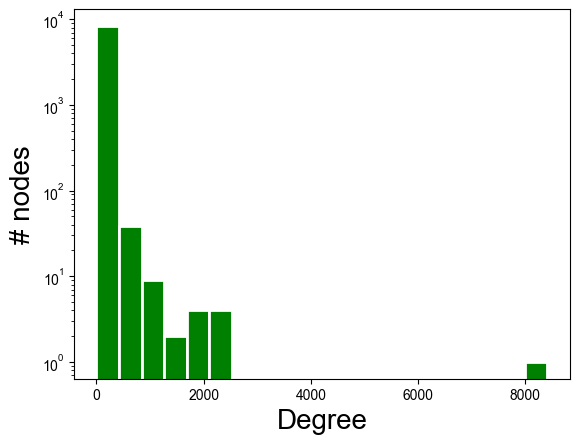

In [8]:
tb.plot_dd(G, 20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.4424371785853407, 
its standard error sigma: 0.04740142681056513, 
k_min: 59.0


(2.4424371785853407, 0.04740142681056513, 59.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 3.635933433947484e-06.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms lognormal distribution with significance level 0.909034407933009.


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.4424371785853407, 
its standard error sigma: 0.04740142681056513, 
k_min: 59.0


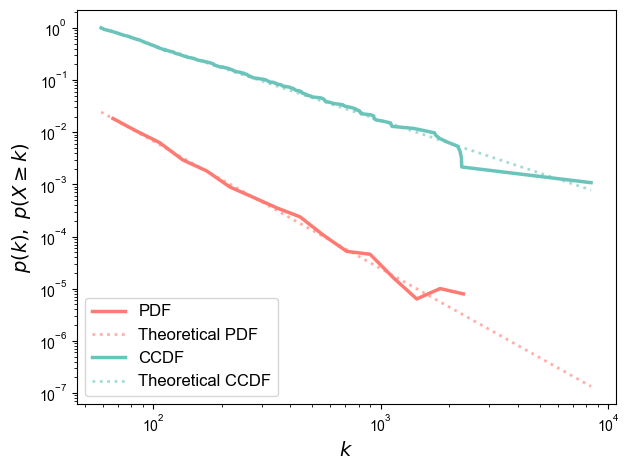

In [12]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")